In [1]:

import SimpleITK as sitk
import os
import shutil
import numpy as np
import copy
import sklearn.model_selection
import nibabel as nib
from matplotlib import pyplot as plt

process: 206_20161001_VOI.nii.gz
process: 106_20141101_VOI.nii.gz
process: 205_20170401_VOI.nii.gz
process: 208_20160901_VOI.nii.gz
process: 207_20170701_VOI.nii.gz
process: 103_20140801_VOI.nii.gz
process: 112_20160101_VOI.nii.gz
process: 211_20150601_VOI.nii.gz
process: 301_20151001_VOI.nii.gz
process: 206_20160301_VOI.nii.gz
process: 110_20171201_VOI.nii.gz
process: 103_20170901_VOI.nii.gz
process: 214_20160201_VOI.nii.gz
process: 106_20160101_VOI.nii.gz
process: 301_20161101_VOI.nii.gz
process: 110_20151101_VOI.nii.gz
process: 212_20130601_VOI.nii.gz
process: 104_20160701_VOI.nii.gz
process: 209_20150101_VOI.nii.gz
process: 113_20141201_VOI.nii.gz
process: 208_20171001_VOI.nii.gz
process: 204_20170101_VOI.nii.gz
process: 202_20170501_VOI.nii.gz
process: 110_20071101v2_VOI.nii.gz
process: 102_20110401v2_VOI.nii.gz
process: 110_20090101v2_VOI.nii.gz
process: 207_20160301_VOI.nii.gz
process: 102_20120601v2_VOI.nii.gz
process: 203_20161001_VOI.nii.gz
process: 211_20140501_VOI.nii.gz
pr

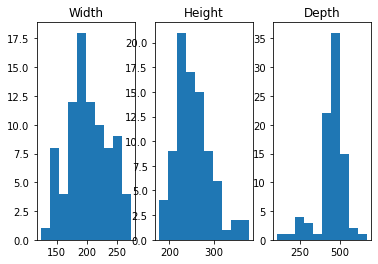

mean size: [201.84883721 253.84883721 444.09302326]


In [22]:
img_list = os.listdir("../cache/NiiBiMask")
sizeMat = np.zeros((len(img_list),3))
for i,name in enumerate(img_list):
    print("process:",name)
    input_filename = os.path.join("../cache/NiiBiMask",name)
    img = nib.load(input_filename)
    sizeMat[i,:] = img.shape

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(sizeMat[:,0])
ax1.set_title("Width")
ax2.hist(sizeMat[:,1])
ax2.set_title("Height")
ax3.hist(sizeMat[:,2])
ax3.set_title("Depth")
plt.savefig("../../results/images/dataset_stats_size.png",dpi=300)

plt.show()
print("mean size:",sizeMat.mean(axis=0))

In [3]:
img_list = os.listdir("../raw/NiiAnnReg")
total_counts = np.zeros(7,)
for i,name in enumerate(img_list):
    print("process:",name)
    input_filename = os.path.join("../raw/NiiAnnReg",name)
    img = nib.load(input_filename)
    (unique, counts) = np.unique(img.get_data(), return_counts=True)
    print(unique, counts)
    total_counts += counts
print("percentathe of each class:", total_counts/total_counts.sum())

process: 209_20150101_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [24238463    15672    28993   166214  1669768    78021    97410]
process: 209_20160101_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [27935365    14753    28599   172982  1891164    81676   101841]
process: 108_20121201_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [22777889    53484   565287   175158   643311   228830    42095]
process: 106_20161201_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [15377686    29123   216580    81711   357262    97156    18754]
process: 208_20160101_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [23398289    35518   389881   228730   869872   208627    47923]
process: 208_20160901_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [16682825    43645   140924   237442   994044    93060    50596]
process: 203_20160801_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [8326134   18742  177481   53845  267219   50074   15860]
process: 212_20111101_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [47345029    55656   326131   333161  2035223   234541    89387]
process: 102_20110401v2

[0 1 2 3 4 5 6] [30956276    24470   703855   181289   565929   177868    41185]
process: 206_20161001_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [30666258    21866   297394   134920  1288161   139002    65999]
process: 115_20140801_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [10419755    28639   223311    92649   157529    53754    12907]
process: 110_20090101v2_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [37906617    40259   358795   224062   851266   431139    85034]
process: 101_20170801_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [34493222    13109   248437    81507   309034    83349    26062]
process: 114_20160701_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [14710930    14559   288255    79462   420844    85689    33490]
process: 205_20170401_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [28781358    47599   304551   215547  1615497   159244    91882]
process: 102_20120601v2_VOI_labelled.nii.gz
[0 1 2 3 4 5 6] [26999392    19543   651792   210169   515261   222084    31439]
process: 110_20051101v2_VOI_labelled.nii.gz
[0 1 2 3 4

In [5]:
perc = total_counts/total_counts.sum()
weights = 1./perc
weights

array([  1.05866153, 883.79145444,  86.54825135, 177.83917639,
        33.34373066, 193.08631133, 517.44818692])

perc =  [0.94458897 0.00113149 0.01155425 0.00562306 0.02999065 0.00517903
 0.00193256]
ratio =  [834.81965779   1.          10.21154605   4.96961059  26.50547605
   4.57718338   1.70798058]


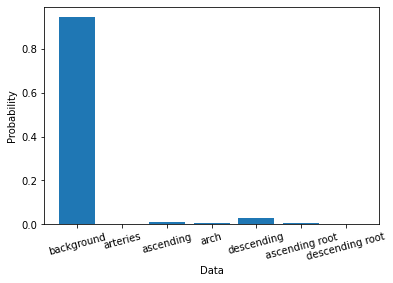

In [25]:
perc = total_counts/total_counts.sum()
print("perc = ",perc)
names = ["background", "arteries","ascending","arch","descending","ascending root","descending root"]
plt.bar(names,list(perc))  # `density=False` would make counts
plt.xticks(names,rotation=15)
plt.ylabel('Probability')
plt.xlabel('Data')
plt.savefig("../../results/images/dataset_stats_class_dist.png",dpi=300)

print("ratio = ", total_counts/total_counts.min() )